<h1 id="tocheading">SVM (Support Vector Machine)</h1>
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

## Входные данные

$2$-классовая $n$-мерная выборка размера $K$ с числовыми признаками. То есть полагаем, что все объекты выборки имеют вид:
$$(x_1, x_2, \dots, x_n, c)\text{, где }c\in\{-1,1\}$$

## Постановка задачи

Хотим разделить выборку какой-то $(n-1)$-мерной гиперплоскостью, чтобы
  1) по одну сторону от гиперплоскости лежали экземпляры первого класса, а по другую стороны экземпляры второго класса (в идеальном случае);

  2) гиперплоскость была "оптимальной".

Какая прямая среди $L_1$, $L_2$ и $L_3$ лучше разделяет выборку?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Classifier.svg/1920px-Classifier.svg.png" alt="drawing" width="500"/>

_**Оптимальная разделяющая гиперплоскость**_ &ndash; такая гиперплоскость, у которой сумма расстояний до двух ближайших к ней точек, лежащих по разные стороны от неё, максимальна. Это определение следует из того, что мы полагаем, что максимизация зазора между классами способствует более уверенной классификации

Математически искомую гиперплоскость можно записать в следующем виде:
$$l(\mathbf{x})=\mathbf{w}\cdot \mathbf{x} +b$$
Тогда определить класс нового объекта становится просто:
$$c(\mathbf{x})=\mathrm{sgn}(\mathbf{w}\cdot \mathbf{x} + b)$$

Таким образом, задача формулируется так: "найти $\mathbf{w}$ и $b$ такие, чтобы гиперплоскость $l(\mathbf{x})=\mathbf{w}\cdot \mathbf{x} +b$ была _**оптимальной разделяющей гиперплоскостью**_"

## Математика

### Случай линейно-разделимой выборки

Назовём _**отступом**_ такое выражение (по сути &ndash; расстояние от точки до гиперплоскости по модулю):
$$M_i=с_i\cdot(\mathbf{w}\cdot\mathbf{x}_i + b)$$

Можно произвести нормировку отступов коэффициентом $\alpha$:
$$M_i=\alpha \cdot с_i\cdot(\mathbf{w}\cdot\mathbf{x}_i + b) = с_i\cdot((\alpha \cdot\mathbf{w})\cdot\mathbf{x}_i + (\alpha \cdot b))$$
так, чтобы отступы ближайших к гиперплоскости точек были равны $1$

Таким образом, суть задачи не меняется &ndash; мы всё так же ищем вектор $(\alpha \cdot\mathbf{w})$ и число $(\alpha \cdot b)$ (далее будем обозначать их просто как $\mathbf{w}$ и $b$) так, чтобы чтобы гиперплоскость $l(\mathbf{x})=\mathbf{w}\cdot \mathbf{x} +b$ была _**оптимальной разделяющей гиперплоскостью**_

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/SVM_margins.svg/1920px-SVM_margins.svg.png" alt="drawing" width="500"/>

Через ближайшие к гиперплоскости точки можно провести полосу, ширина которой будет равна:
$$\mathrm{pr}_{\mathbf{w}}\left(\mathbf{x_+}-\mathbf{x_-}\right)=\left(\mathbf{x_+}-\mathbf{x_-}\right)\cdot \frac{\mathbf{w}}{\lVert\mathbf{w}\rVert}=\frac{\mathbf{w}\cdot\mathbf{x_+} - \mathbf{w}\cdot\mathbf{x_-}}{\lVert\mathbf{w}\rVert}=\frac{\frac{M_+ - b}{c_+}-\frac{M_- - b}{c_-}}{\lVert\mathbf{w}\rVert}=\frac{\frac{1 - b}{1}-\frac{1 - b}{-1}}{\lVert\mathbf{w}\rVert}=\frac{1 - b+b+1}{\lVert\mathbf{w}\rVert}=\frac{2}{\lVert\mathbf{w}\rVert}$$
где $\mathbf{x_+}$ &ndash; ближайшая точка с "положительной" стороны гиперплоскости, т.е. представитель положительного класса ($c_+ = 1$), а $\mathbf{x_-}$ &ndash; ближайшая точка с "отрицательной" стороны гиперплоскости, т.е. отрицательный класс ($c_- = 1$)

Получается, чем меньше $\lVert\mathbf{w}\rVert$, тем больше ширина полосы

Таким образом, можно сформулировать задачу математически:
$$
\left\{\begin{aligned} 
    & \lVert\mathbf{w}\rVert^2\rightarrow\min &\\ 
    & M_i\geqslant 1,&\text{ где }i = 1,\dots,K
\end{aligned}\right. 
$$

### Случай линейно-неразделимой выборки

Если выборка линейно-неразделима, то, как ни крути, будут экземпляры какого-либо из классов, которые будут лежать не на "своей" стороне от гиперплоскости. Такое поведение будет означать, что не для всех экземпляров класса будет выполняться условие
$$M_i \geqslant 1, \text{ где } i = 1, \dots, K$$

Разрешим эту проблему, введя ошибку $\xi_i$. Тогда условие на отступы может быть записано как:
$$M_i \geqslant 1 - \xi_i, \text{ где } i = 1, \dots, K$$
Очевидно, что $\forall i\in\{1,\dots,K\} \: \xi_i \rightarrow 0$, т.к. мы хотим минимизировать ошибку

Тогда задача будет записана как ($C$ &ndash; выбранный нами гиперпараметр):
$$
\begin{array}{cccc}
    \left\{\begin{aligned} 
        & \lVert\mathbf{w}\rVert^2+C\cdot\sum_{j=1}^{K}\xi_j\rightarrow\min &\\ 
        & M_i\geqslant 1-\xi_i,&\text{ где }i = 1,\dots,K\\
        & \xi_i\geqslant 0,&\text{ где }i = 1,\dots,K
    \end{aligned}\right.
    & \Rightarrow &
    \left\{\begin{aligned} 
        & \lVert\mathbf{w}\rVert^2+C\cdot\sum_{j=1}^{K}\xi_j\rightarrow\min &\\ 
        & \xi_i\geqslant1-M_i,&\text{ где }i = 1,\dots,K\\
        & \xi_i\geqslant 0,&\text{ где }i = 1,\dots,K
    \end{aligned}\right.
    & \Rightarrow \\
    & \Rightarrow &
    \left\{\begin{aligned} 
        & \lVert\mathbf{w}\rVert^2+C\cdot\sum_{j=1}^{K}\xi_j\rightarrow\min &\\ 
        & \xi_i=\max(0,1-M_i),&\text{ где }i = 1,\dots,K
    \end{aligned}\right.
    & \Rightarrow \\
    & \Rightarrow &
    \left\{\begin{aligned} 
        & \lVert\mathbf{w}\rVert^2+C\cdot\sum_{j=1}^{K}\xi_j\rightarrow\min &\\ 
        & \xi_i=(1-M_i)_+,&\text{ где }i = 1,\dots,K
    \end{aligned}\right.
    & \Rightarrow \\
    & \Rightarrow &
    \begin{aligned} 
        & C\cdot\sum_{j=1}^{K}(1-M_j)_++\lVert\mathbf{w}\rVert^2\rightarrow\min
    \end{aligned}
    & \Rightarrow \\
    & \Rightarrow &
    \begin{aligned} 
        \sum_{j=1}^{K}(1-M_j)_++\frac{1}{C}\lVert\mathbf{w}\rVert^2\rightarrow\min
    \end{aligned}
    &
\end{array}
$$

Итого, есть оптимизационная задача:
$$
\sum_{j=1}^{K}(1-M_j)_++\frac{1}{C}\lVert\mathbf{w}\rVert^2\rightarrow\min
$$

Решать её привычными градиентными методами не получится, т.к. из-за наличия в составе функции $(1-M_j)_+$, график общей функции имеет "острые углы", в которых не существует производной

Но выполнение условий теоремы Куна-Таккера помогают свести эту задачу к поиску седловой точки функции Лагранжа (именно такой алгоритм реализован во многих библиотеках). При сведении нашей задачи к упомянутой ранее получаем полезные соотношения (следствия из необходимых условий седловой точки):
$$
\left\{\begin{aligned} 
    & \mathbf{w} = \sum_{i=1}^{K}\lambda_i \cdot c_i \cdot \mathbf{x}_i \\
    & 0 \leqslant \lambda_i \leqslant C, &\text{ где } i=1,...,K
\end{aligned}\right.
$$

Получается, $\mathbf{w}$ &ndash; линейная комбинация объектов из выборки. Таким образом:
  * Если $\lambda_i=0$, то $\mathbf{x}_i$ не используется для вычисления $\mathbf{w}$
  * Если $\lambda_i\neq0$, то $\mathbf{x}_i$ используется для вычисления $\mathbf{w}$ и называется _**опорным вектором**_

Более подробно классифицируем объекты выборки по $\lambda$, $\xi$ и $M$:
  * $\lambda_i=0;\xi_i=0;M_i\geqslant1$ &ndash; неинформативный объект, лежащий за пределами полосы
  * $0<\lambda_i< C;\xi_i=0;M_i=1$ &ndash; опорный объект, лежащий на границе полосы
  * $\lambda_i=C;\xi_i>0;M_i\leqslant1$ &ndash; ошибочный опорный объект, лежащий не в "своей" области

Если есть основания полагать, что выборка почти линейно разделима, и лишь объекты-выбросы классифицируются неверно, то можно применить фильтрацию выбросов. Сначала задача решается при некотором $C$, и из выборки удаляется небольшая доля объектов, имеющих наибольшую величину ошибки $\xi_i$. После этого задача решается заново по усечённой выборке. Возможно, придётся проделать несколько таких итераций, пока оставшиеся объекты не окажутся линейно разделимыми

### Ядра SVM

Существует ещё один подход к решению проблемы линейной неразделимости. Это переход от исходного пространства признаковых описаний объектов $X$ к новому пространству $H$ с помощью некоторого преобразования $\psi : X \rightarrow H$. Если пространство $H$ имеет достаточно высокую размерность, то можно надеяться, что в нём выборка окажется линейно разделимой. Такое пространство $H$ называется _**спрямляющим**_

Единственным отличием при решении задачи в пространстве $H$ будет замена скалярного произведения $\mathbf{x}\cdot \mathbf{y}$, проводимого в $X$ на $\psi(\mathbf{x})\cdot \psi(\mathbf{y})$, проводимое в $H$.

Таким образом, на пространство $H$ накладывается условие о существовании в нём операции скалярного произведения. В частности, на роль $H$ подойдёт любое евклидово пространство, а в общем случае &ndash; и гильбертово

Поскольку оптимизационная задача
$$
\sum_{j=1}^{K}(1-M_j)_++\frac{1}{C}\lVert\mathbf{w}\rVert^2\rightarrow\min
$$
а конкретно функция
$$
(1-M_j)_+ = \max(0, 1-с_j\cdot(\mathbf{w}\cdot\mathbf{x}_j + b))
$$
зависит только от скалярных произведений объектов, а не от их размерности или того, как они представлены, можно заменить скалярное произведение $\mathbf{x} \cdot \mathbf{y}$ на ядро $K(\mathbf{x}, \mathbf{y})$

_**Ядро**_ &ndash; это некая функция $K : X \times X \rightarrow \mathbb{R}$, представимая в виде $K(\mathbf{x}, \mathbf{y}) = \psi(\mathbf{x})\cdot\psi(\mathbf{y})$ при некотором отображении $\psi : X \rightarrow H$,
где $H$ &ndash; пространство со скалярным произведением

Ядром может быть не всякая функция, а только та, которая удовлетворяет теореме Мерсера:
    
Функция $K(\mathbf{x}, \mathbf{y})$ является ядром тогда и только тогда, когда она симметрична и неотрицательно определена, то есть:
$$
\left\{\begin{aligned} 
    & K(\mathbf{x}, \mathbf{y}) = K(\mathbf{y}, \mathbf{x}) \\
    & \int_X\int_XK(\mathbf{x}, \mathbf{y})g(\mathbf{x})g(\mathbf{y})d\mathbf{x}d\mathbf{y} \geqslant 0 & \forall g: X \rightarrow \mathbb{R}
\end{aligned}\right.
$$

К счастью, класс функций, которые удовлетворяют этой теореме, довольно широк

#### Линейное ядро (Linear)

<img src="https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_svm_kernels_001.png" alt="drawing"/>

$$
K(\mathbf{x}, \mathbf{y}) = \mathbf{x} \cdot \mathbf{y}
$$

#### Полиномиальное ядро (Polynomial)

<img src="https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_svm_kernels_002.png" alt="drawing"/>

$$
K(\mathbf{x}, \mathbf{y}) = (\gamma \cdot \mathbf{x} \cdot \mathbf{y} + r)^d
$$

#### Гауссовское (RBF)

<img src="https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_svm_kernels_003.png" alt="drawing"/>

$$
K(\mathbf{x}, \mathbf{y}) = \exp\left(-\gamma\lVert\mathbf{x} - \mathbf{y}\rVert^2\right)
$$

#### Сигмоидальное (Sigmoig)

$$
K(\mathbf{x}, \mathbf{y}) = \tanh\left(\gamma\mathbf{x} \cdot \mathbf{y} + r\right)
$$

## Программирование

### sklearn

```Python
class sklearn.svm.SVC(*, C, kernel, degree, gamma, coef0, ...)
```

* `C` &ndash; параметр регуляризации (ограничение на $\lambda$), по умолчанию &ndash; `1.0`
* `kernel` &ndash; ядро, по умолчанию &ndash; `rbf`
* `degree` &ndash; степень, используемая для полиномиального ядра, по умолчанию &ndash; `3`
* `gamma` &ndash; $\gamma$, используемая для гауссовского, полиномиального и сигмоидального ядер
* `coef0` &ndash; $r$, используемый в полиномиальном и сигмоидальном ядрах, по умолчанию &ndash; `0.0`

Помимо общего классификатора `sklearn.svm.SVC` библиотека предоставляет классификатор `sklearn.svm.LinearSVC`. Данный классификатор &ndash; более гибко настраиваемая реализация класса `sklearn.svm.SVC` с линейным ядром. Как написано в документации, использование этого классификатора оправдано, если:
  * выборка линейно разделима (использование обычного `sklearn.svm.SVC` не предоставляет возможности более гибкой настройки)
  * выборка имеет очень большой размер (алгоритм с линейным ядром считается намного быстрее, чем с нелинейным)

### Задача определения радиопульсара

<img src="https://minio.nplus1.ru/app-images/173414/21e042b955d6a65f1ef1694564a193bc.jpg" alt="drawing" width=500/>

_**Радиопульсар**_ - космический источник радиоизлучения, приходящего на Землю в виде периодических всплесков (импульсов). Согласно доминирующей астрофизической модели, пульсары представляют собой вращающиеся нейтронные звёзды с магнитным полем, которое наклонено к оси вращения, что вызывает модуляцию приходящего на Землю излучения.

Набор данных содержит 16259 ложных примеров, вызванных интерференцией или шумом, и 1639 реальных примеров радиопульсаров.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
DATA_FILE_PATH = "radiopulsars.csv"

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv",
    DATA_FILE_PATH)
pass

In [3]:
df = pd.read_csv(DATA_FILE_PATH)
df.columns = ["IP Mean",     "IP Sd",     "IP Kurtosis",     "IP Skewness", 
              "DM-SNR Mean", "DM-SNR Sd", "DM-SNR Kurtosis", "DM-SNR Skewness",
              "target_class"]

In [4]:
df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
X = df.drop(["target_class"], axis=1)
y = df["target_class"]

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [8]:
X.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


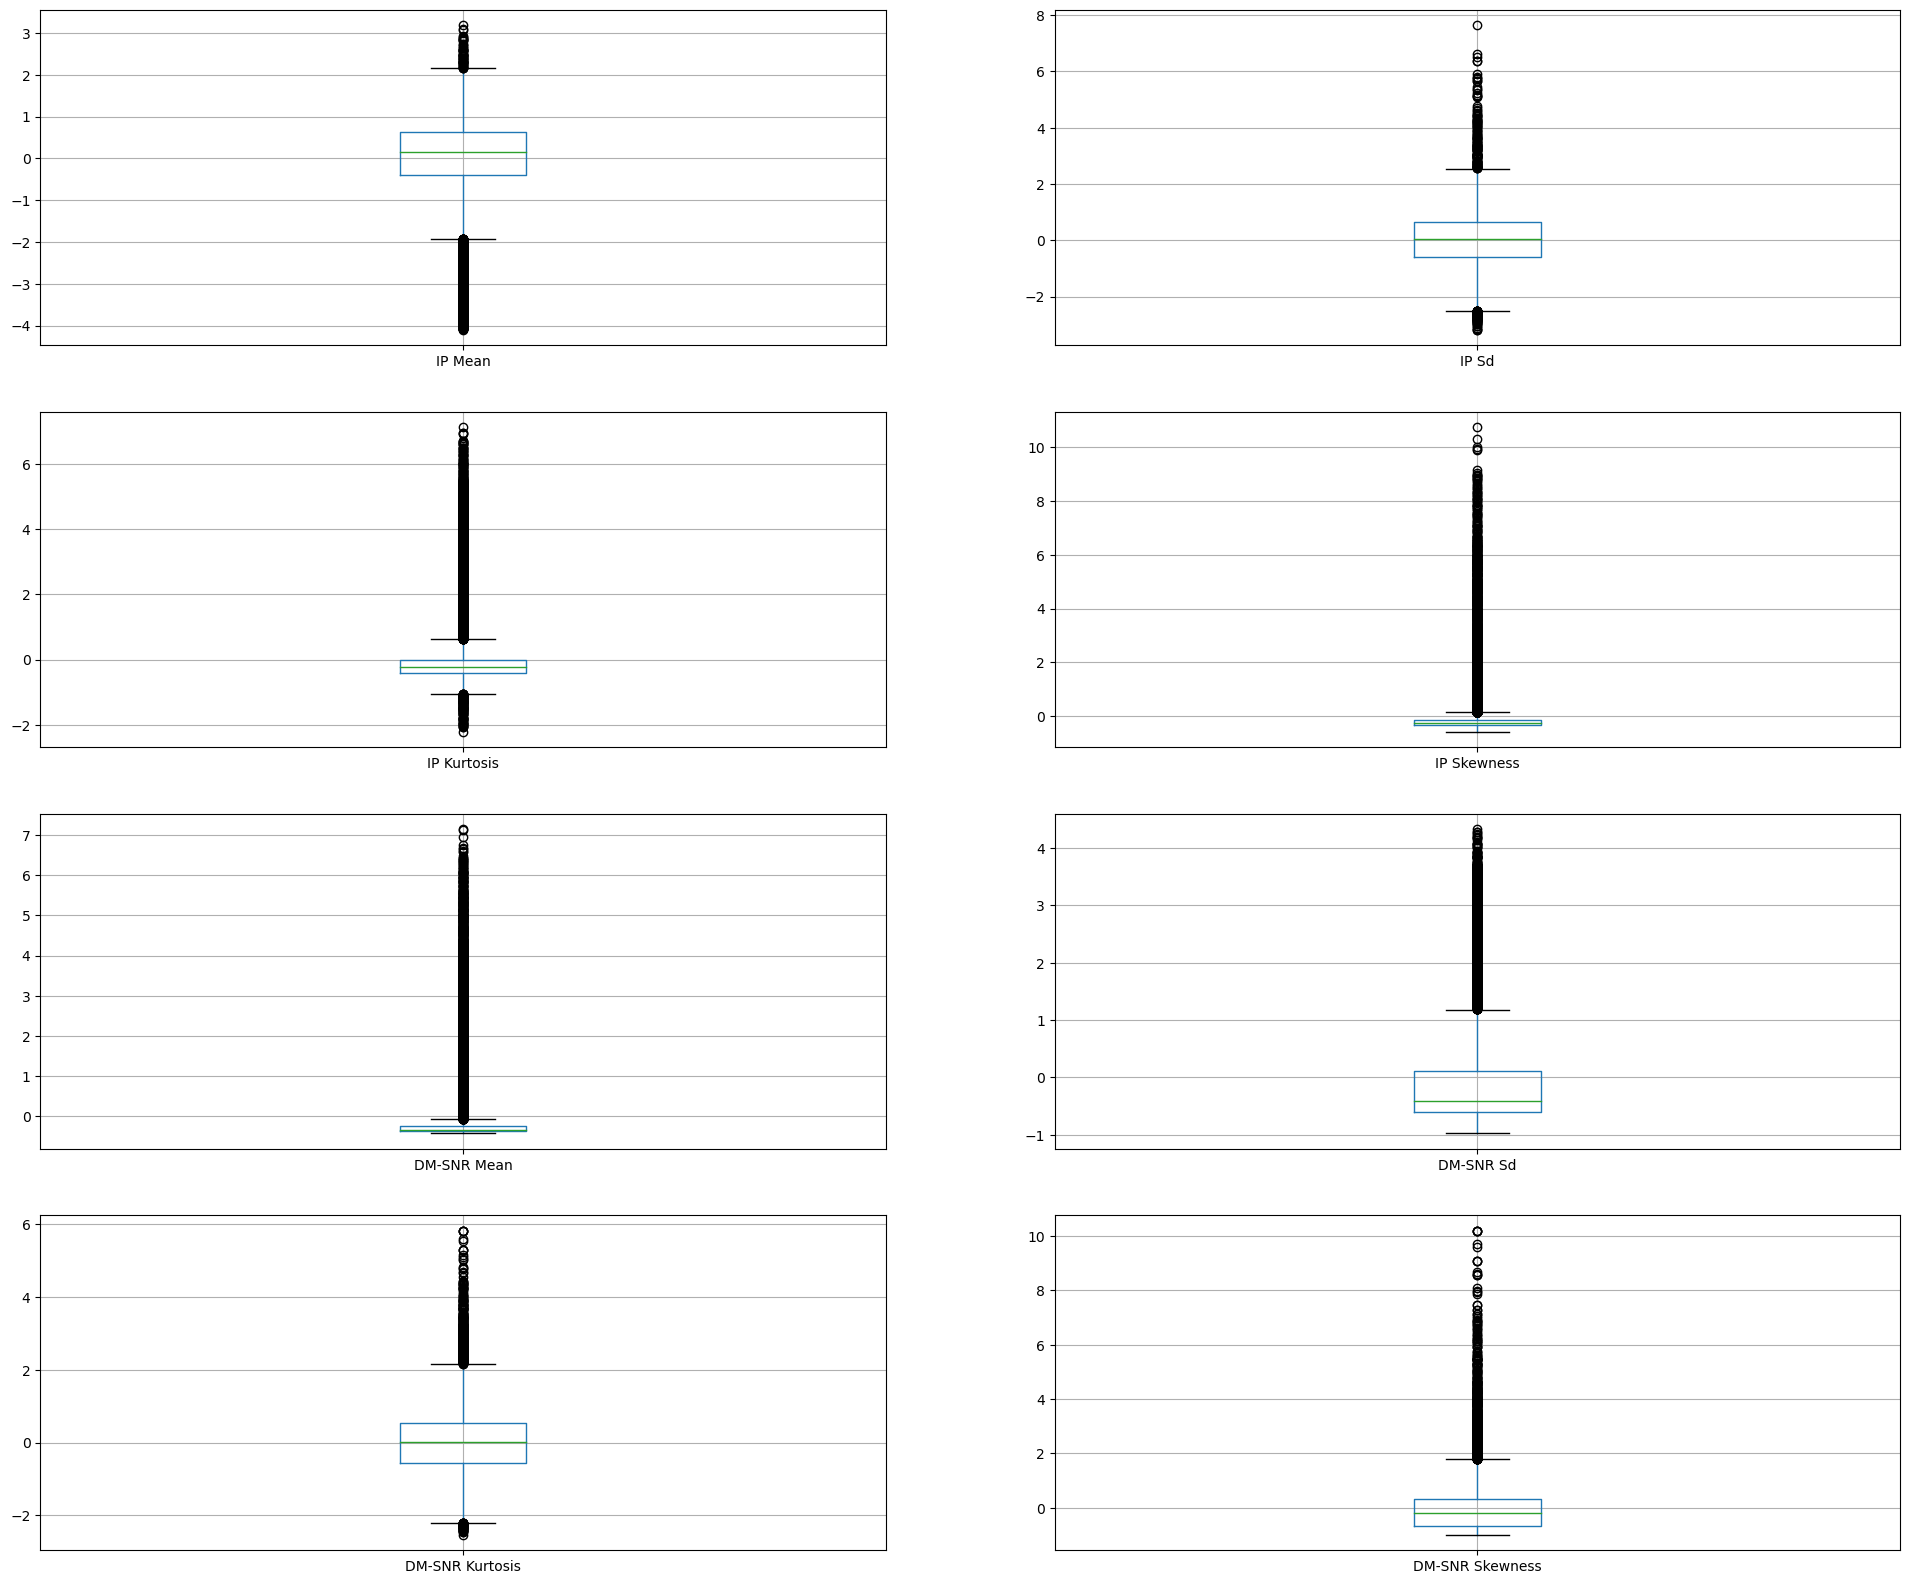

In [9]:
def draw_boxplot(plot_number: int, column: str) -> None:
    plt.subplot(4, 2, plot_number)
    X.boxplot(column=column)

plt.figure(figsize=(24,20))

for i, column in enumerate(X.columns):
    draw_boxplot(i + 1, column)

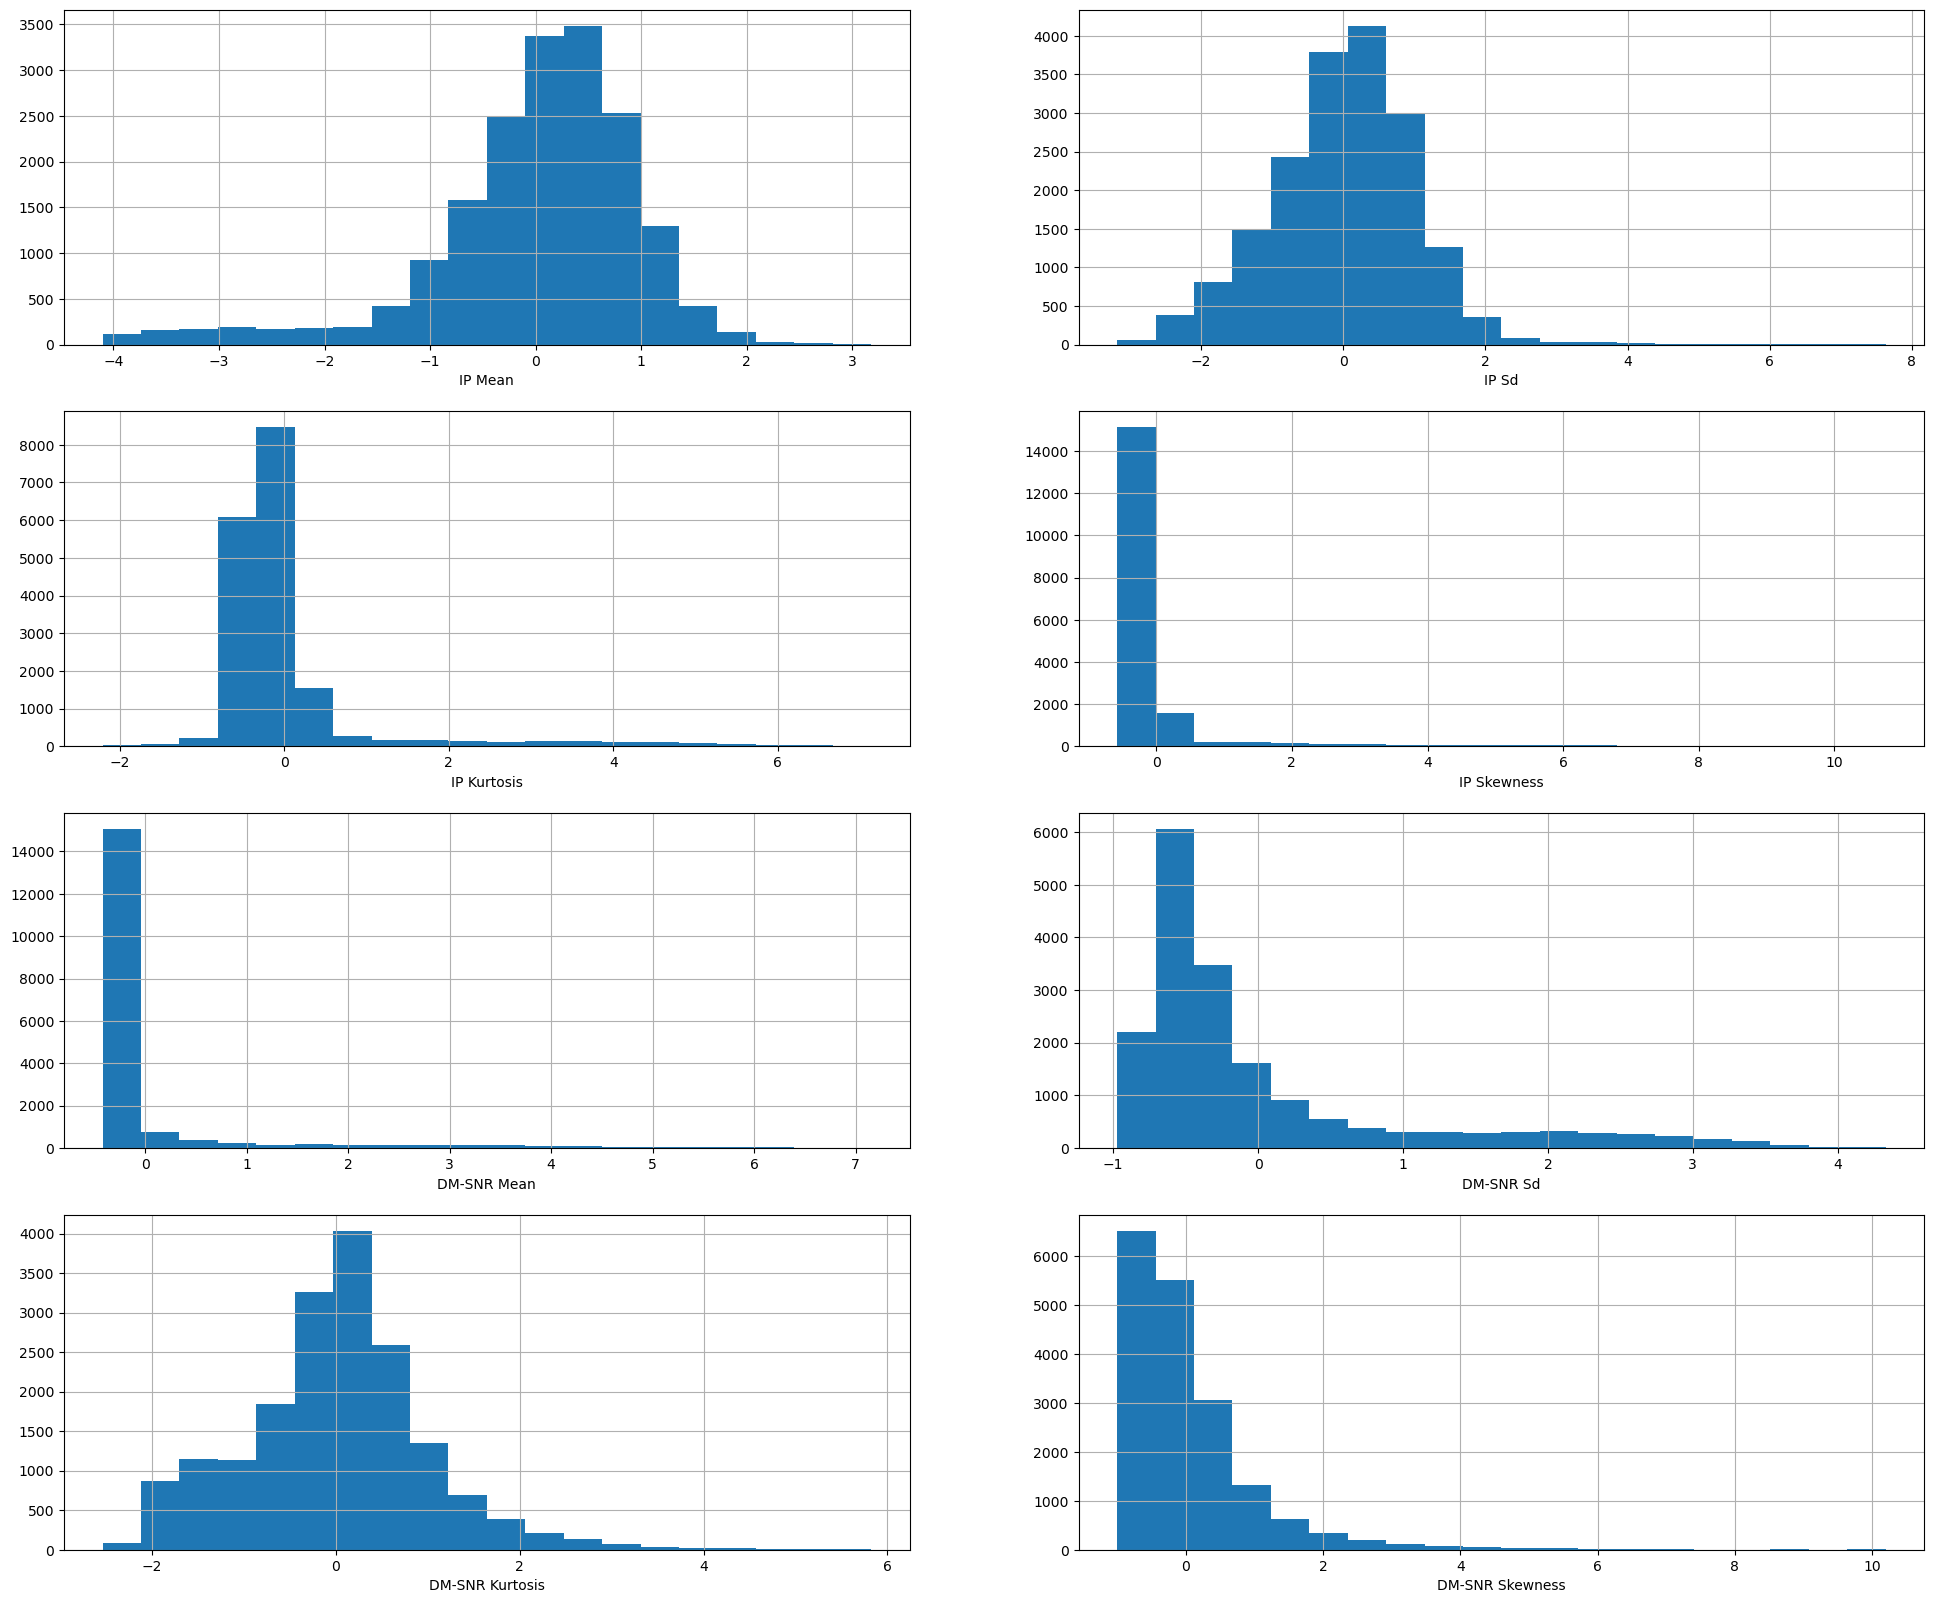

In [10]:
def draw_histplot(plot_number: int, column: str, n_bins: int) -> None:
    plt.subplot(4, 2, plot_number)
    fig = X[column].hist(bins=n_bins)
    fig.set_xlabel(column)

plt.figure(figsize=(24,20))

for i, column in enumerate(X.columns):
    draw_histplot(i + 1, column, 20)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [44]:
simple_clf = SVC()
simple_clf.fit(X_train, y_train)
f1_score(y_test, simple_clf.predict(X_test))

0.851851851851852

In [30]:
clf = SVC()

linear_params = {
    "C":      [1, 5, 10, 50, 100],
    "kernel": ["linear"]
}

poly_params = {
    "C":      [1, 5, 10, 50, 100],
    "kernel": ["poly"],
    "degree": np.arange(1, 6, 1),       # 1, ..., 5
    "gamma":  ["scale", "auto"],
    "coef0":  np.arange(-0.9, 1.2, 0.3) # -0.9, -0.6, ..., 0.6, 0.9
}

rbf_params = {
    "C":      [1, 5, 10, 50, 100],
    "kernel": ["rbf"],
    "gamma":  ["scale", "auto"]
}

sigmoid_params = {
    "C":      [1, 5, 10, 50, 100],
    "kernel": ["sigmoid"],
    "gamma":  ["scale", "auto"],
    "coef0":  np.arange(-0.9, 1.2, 0.3) # -0.9, -0.6, ..., 0.6, 0.9
}

params = [
    linear_params,
    poly_params,
    rbf_params,
    sigmoid_params
]

grid_search = GridSearchCV(estimator=clf,
                           param_grid=params,
                           scoring="f1",
                           n_jobs=8,
                           verbose=10)

In [32]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 495 candidates, totalling 2475 fits
[CV 4/5; 1/495] START C=1, kernel=linear........................................
[CV 4/5; 1/495] END .........C=1, kernel=linear;, score=0.892 total time=   0.4s
[CV 5/5; 2/495] START C=5, kernel=linear........................................
[CV 5/5; 2/495] END .........C=5, kernel=linear;, score=0.839 total time=   0.6s
[CV 3/5; 4/495] START C=50, kernel=linear.......................................
[CV 3/5; 4/495] END ........C=50, kernel=linear;, score=0.899 total time=   2.3s
[CV 2/5; 6/495] START C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly.......
[CV 2/5; 6/495] END C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly;, score=0.887 total time=   0.4s
[CV 5/5; 6/495] START C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly.......
[CV 5/5; 6/495] END C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly;, score=0.829 total time=   0.3s
[CV 3/5; 7/495] START C=1, coef0=-0.9, degree=1, gamma=auto, kernel=poly......

[CV 1/5; 1/495] START C=1, kernel=linear........................................
[CV 1/5; 1/495] END .........C=1, kernel=linear;, score=0.897 total time=   0.4s
[CV 1/5; 3/495] START C=10, kernel=linear.......................................
[CV 1/5; 3/495] END ........C=10, kernel=linear;, score=0.899 total time=   0.8s
[CV 4/5; 4/495] START C=50, kernel=linear.......................................
[CV 4/5; 4/495] END ........C=50, kernel=linear;, score=0.897 total time=   1.9s
[CV 1/5; 6/495] START C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly.......
[CV 1/5; 6/495] END C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly;, score=0.892 total time=   0.3s
[CV 4/5; 6/495] START C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly.......
[CV 4/5; 6/495] END C=1, coef0=-0.9, degree=1, gamma=scale, kernel=poly;, score=0.890 total time=   0.3s
[CV 2/5; 7/495] START C=1, coef0=-0.9, degree=1, gamma=auto, kernel=poly........
[CV 2/5; 7/495] END C=1, coef0=-0.9, degree=1, gamma=auto, ke

[CV 2/5; 1/495] START C=1, kernel=linear........................................
[CV 2/5; 1/495] END .........C=1, kernel=linear;, score=0.890 total time=   0.5s
[CV 3/5; 3/495] START C=10, kernel=linear.......................................
[CV 3/5; 3/495] END ........C=10, kernel=linear;, score=0.899 total time=   0.9s
[CV 1/5; 5/495] START C=100, kernel=linear......................................
[CV 1/5; 5/495] END .......C=100, kernel=linear;, score=0.899 total time=   3.1s
[CV 4/5; 8/495] START C=1, coef0=-0.9, degree=2, gamma=scale, kernel=poly.......
[CV 4/5; 8/495] END C=1, coef0=-0.9, degree=2, gamma=scale, kernel=poly;, score=0.245 total time=   0.7s
[CV 1/5; 10/495] START C=1, coef0=-0.9, degree=3, gamma=scale, kernel=poly......
[CV 1/5; 10/495] END C=1, coef0=-0.9, degree=3, gamma=scale, kernel=poly;, score=0.531 total time=   0.5s
[CV 3/5; 10/495] START C=1, coef0=-0.9, degree=3, gamma=scale, kernel=poly......
[CV 3/5; 10/495] END C=1, coef0=-0.9, degree=3, gamma=scale,

[CV 3/5; 2/495] START C=5, kernel=linear........................................
[CV 3/5; 2/495] END .........C=5, kernel=linear;, score=0.899 total time=   0.7s
[CV 1/5; 4/495] START C=50, kernel=linear.......................................
[CV 1/5; 4/495] END ........C=50, kernel=linear;, score=0.899 total time=   2.2s
[CV 4/5; 5/495] START C=100, kernel=linear......................................
[CV 4/5; 5/495] END .......C=100, kernel=linear;, score=0.897 total time=   3.2s
[CV 1/5; 12/495] START C=1, coef0=-0.9, degree=4, gamma=scale, kernel=poly......
[CV 1/5; 12/495] END C=1, coef0=-0.9, degree=4, gamma=scale, kernel=poly;, score=0.321 total time=   0.7s
[CV 5/5; 13/495] START C=1, coef0=-0.9, degree=4, gamma=auto, kernel=poly.......
[CV 5/5; 13/495] END C=1, coef0=-0.9, degree=4, gamma=auto, kernel=poly;, score=0.316 total time=   0.7s
[CV 3/5; 15/495] START C=1, coef0=-0.9, degree=5, gamma=auto, kernel=poly.......
[CV 3/5; 15/495] END C=1, coef0=-0.9, degree=5, gamma=auto, 

[CV 3/5; 60/495] END C=1, coef0=0.5999999999999995, degree=3, gamma=scale, kernel=poly;, score=0.902 total time=   0.6s
[CV 3/5; 61/495] START C=1, coef0=0.5999999999999995, degree=3, gamma=auto, kernel=poly
[CV 3/5; 61/495] END C=1, coef0=0.5999999999999995, degree=3, gamma=auto, kernel=poly;, score=0.902 total time=   0.7s
[CV 5/5; 62/495] START C=1, coef0=0.5999999999999995, degree=4, gamma=scale, kernel=poly
[CV 5/5; 62/495] END C=1, coef0=0.5999999999999995, degree=4, gamma=scale, kernel=poly;, score=0.834 total time=   1.0s
[CV 3/5; 64/495] START C=1, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly
[CV 3/5; 64/495] END C=1, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly;, score=0.895 total time=   3.6s
[CV 2/5; 66/495] START C=1, coef0=0.8999999999999996, degree=1, gamma=scale, kernel=poly
[CV 2/5; 66/495] END C=1, coef0=0.8999999999999996, degree=1, gamma=scale, kernel=poly;, score=0.887 total time=   0.4s
[CV 3/5; 66/495] START C=1, coef0=0.8999999999

[CV 5/5; 64/495] START C=1, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly
[CV 5/5; 64/495] END C=1, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly;, score=0.843 total time=   4.1s
[CV 1/5; 67/495] START C=1, coef0=0.8999999999999996, degree=1, gamma=auto, kernel=poly
[CV 1/5; 67/495] END C=1, coef0=0.8999999999999996, degree=1, gamma=auto, kernel=poly;, score=0.892 total time=   0.4s
[CV 1/5; 68/495] START C=1, coef0=0.8999999999999996, degree=2, gamma=scale, kernel=poly
[CV 1/5; 68/495] END C=1, coef0=0.8999999999999996, degree=2, gamma=scale, kernel=poly;, score=0.895 total time=   0.4s
[CV 2/5; 69/495] START C=1, coef0=0.8999999999999996, degree=2, gamma=auto, kernel=poly
[CV 2/5; 69/495] END C=1, coef0=0.8999999999999996, degree=2, gamma=auto, kernel=poly;, score=0.886 total time=   0.4s
[CV 4/5; 70/495] START C=1, coef0=0.8999999999999996, degree=3, gamma=scale, kernel=poly
[CV 4/5; 70/495] END C=1, coef0=0.8999999999999996, degree=3, gamma=scale, kern

[CV 2/5; 67/495] START C=1, coef0=0.8999999999999996, degree=1, gamma=auto, kernel=poly
[CV 2/5; 67/495] END C=1, coef0=0.8999999999999996, degree=1, gamma=auto, kernel=poly;, score=0.887 total time=   0.5s
[CV 2/5; 68/495] START C=1, coef0=0.8999999999999996, degree=2, gamma=scale, kernel=poly
[CV 2/5; 68/495] END C=1, coef0=0.8999999999999996, degree=2, gamma=scale, kernel=poly;, score=0.886 total time=   0.4s
[CV 4/5; 69/495] START C=1, coef0=0.8999999999999996, degree=2, gamma=auto, kernel=poly
[CV 4/5; 69/495] END C=1, coef0=0.8999999999999996, degree=2, gamma=auto, kernel=poly;, score=0.890 total time=   0.4s
[CV 1/5; 71/495] START C=1, coef0=0.8999999999999996, degree=3, gamma=auto, kernel=poly
[CV 1/5; 71/495] END C=1, coef0=0.8999999999999996, degree=3, gamma=auto, kernel=poly;, score=0.903 total time=   0.7s
[CV 3/5; 72/495] START C=1, coef0=0.8999999999999996, degree=4, gamma=scale, kernel=poly
[CV 3/5; 72/495] END C=1, coef0=0.8999999999999996, degree=4, gamma=scale, kernel

[CV 4/5; 84/495] START C=1, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly
[CV 4/5; 84/495] END C=1, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.879 total time=   4.6s
[CV 1/5; 86/495] START C=5, coef0=-0.9, degree=1, gamma=scale, kernel=poly......
[CV 1/5; 86/495] END C=5, coef0=-0.9, degree=1, gamma=scale, kernel=poly;, score=0.895 total time=   0.5s
[CV 5/5; 86/495] START C=5, coef0=-0.9, degree=1, gamma=scale, kernel=poly......
[CV 5/5; 86/495] END C=5, coef0=-0.9, degree=1, gamma=scale, kernel=poly;, score=0.839 total time=   0.4s
[CV 4/5; 87/495] START C=5, coef0=-0.9, degree=1, gamma=auto, kernel=poly.......
[CV 4/5; 87/495] END C=5, coef0=-0.9, degree=1, gamma=auto, kernel=poly;, score=0.892 total time=   0.5s
[CV 4/5; 88/495] START C=5, coef0=-0.9, degree=2, gamma=scale, kernel=poly......
[CV 4/5; 88/495] END C=5, coef0=-0.9, degree=2, gamma=scale, kernel=poly;, score=0.244 total time=   1.0s
[CV 4/5; 89/495] START C=5, coef0=-0.9, degr

[CV 5/5; 130/495] END C=5, coef0=0.2999999999999997, degree=3, gamma=scale, kernel=poly;, score=0.848 total time=   1.1s
[CV 5/5; 131/495] START C=5, coef0=0.2999999999999997, degree=3, gamma=auto, kernel=poly
[CV 5/5; 131/495] END C=5, coef0=0.2999999999999997, degree=3, gamma=auto, kernel=poly;, score=0.848 total time=   1.1s
[CV 5/5; 132/495] START C=5, coef0=0.2999999999999997, degree=4, gamma=scale, kernel=poly
[CV 5/5; 132/495] END C=5, coef0=0.2999999999999997, degree=4, gamma=scale, kernel=poly;, score=0.838 total time=   3.1s
[CV 3/5; 134/495] START C=5, coef0=0.2999999999999997, degree=5, gamma=scale, kernel=poly
[CV 3/5; 134/495] END C=5, coef0=0.2999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.889 total time=   7.3s
[CV 1/5; 136/495] START C=5, coef0=0.5999999999999995, degree=1, gamma=scale, kernel=poly
[CV 1/5; 136/495] END C=5, coef0=0.5999999999999995, degree=1, gamma=scale, kernel=poly;, score=0.895 total time=   0.5s
[CV 4/5; 136/495] START C=5, coef0=0.

[CV 3/5; 118/495] END C=5, coef0=-2.220446049250313e-16, degree=2, gamma=scale, kernel=poly;, score=0.861 total time=   0.8s
[CV 3/5; 120/495] START C=5, coef0=-2.220446049250313e-16, degree=3, gamma=scale, kernel=poly
[CV 3/5; 120/495] END C=5, coef0=-2.220446049250313e-16, degree=3, gamma=scale, kernel=poly;, score=0.897 total time=   1.3s
[CV 5/5; 121/495] START C=5, coef0=-2.220446049250313e-16, degree=3, gamma=auto, kernel=poly
[CV 5/5; 121/495] END C=5, coef0=-2.220446049250313e-16, degree=3, gamma=auto, kernel=poly;, score=0.831 total time=   1.4s
[CV 2/5; 123/495] START C=5, coef0=-2.220446049250313e-16, degree=4, gamma=auto, kernel=poly
[CV 2/5; 123/495] END C=5, coef0=-2.220446049250313e-16, degree=4, gamma=auto, kernel=poly;, score=0.875 total time=   2.5s
[CV 5/5; 124/495] START C=5, coef0=-2.220446049250313e-16, degree=5, gamma=scale, kernel=poly
[CV 5/5; 124/495] END C=5, coef0=-2.220446049250313e-16, degree=5, gamma=scale, kernel=poly;, score=0.811 total time=   8.4s
[CV

[CV 3/5; 126/495] START C=5, coef0=0.2999999999999997, degree=1, gamma=scale, kernel=poly
[CV 3/5; 126/495] END C=5, coef0=0.2999999999999997, degree=1, gamma=scale, kernel=poly;, score=0.899 total time=   0.5s
[CV 2/5; 127/495] START C=5, coef0=0.2999999999999997, degree=1, gamma=auto, kernel=poly
[CV 2/5; 127/495] END C=5, coef0=0.2999999999999997, degree=1, gamma=auto, kernel=poly;, score=0.890 total time=   0.4s
[CV 1/5; 128/495] START C=5, coef0=0.2999999999999997, degree=2, gamma=scale, kernel=poly
[CV 1/5; 128/495] END C=5, coef0=0.2999999999999997, degree=2, gamma=scale, kernel=poly;, score=0.897 total time=   0.6s
[CV 1/5; 129/495] START C=5, coef0=0.2999999999999997, degree=2, gamma=auto, kernel=poly
[CV 1/5; 129/495] END C=5, coef0=0.2999999999999997, degree=2, gamma=auto, kernel=poly;, score=0.897 total time=   0.6s
[CV 1/5; 130/495] START C=5, coef0=0.2999999999999997, degree=3, gamma=scale, kernel=poly
[CV 1/5; 130/495] END C=5, coef0=0.2999999999999997, degree=3, gamma=s

[CV 5/5; 138/495] END C=5, coef0=0.5999999999999995, degree=2, gamma=scale, kernel=poly;, score=0.840 total time=   0.6s
[CV 5/5; 139/495] START C=5, coef0=0.5999999999999995, degree=2, gamma=auto, kernel=poly
[CV 5/5; 139/495] END C=5, coef0=0.5999999999999995, degree=2, gamma=auto, kernel=poly;, score=0.840 total time=   0.6s
[CV 4/5; 140/495] START C=5, coef0=0.5999999999999995, degree=3, gamma=scale, kernel=poly
[CV 4/5; 140/495] END C=5, coef0=0.5999999999999995, degree=3, gamma=scale, kernel=poly;, score=0.881 total time=   1.3s
[CV 3/5; 142/495] START C=5, coef0=0.5999999999999995, degree=4, gamma=scale, kernel=poly
[CV 3/5; 142/495] END C=5, coef0=0.5999999999999995, degree=4, gamma=scale, kernel=poly;, score=0.900 total time=   3.7s
[CV 2/5; 144/495] START C=5, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly
[CV 2/5; 144/495] END C=5, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly;, score=0.889 total time=   7.2s
[CV 4/5; 145/495] START C=5, coef0=0.

[CV 4/5; 169/495] START C=10, coef0=-0.9, degree=2, gamma=auto, kernel=poly.....
[CV 4/5; 169/495] END C=10, coef0=-0.9, degree=2, gamma=auto, kernel=poly;, score=0.244 total time=   1.0s
[CV 1/5; 171/495] START C=10, coef0=-0.9, degree=3, gamma=auto, kernel=poly.....
[CV 1/5; 171/495] END C=10, coef0=-0.9, degree=3, gamma=auto, kernel=poly;, score=0.533 total time=   0.6s
[CV 5/5; 171/495] START C=10, coef0=-0.9, degree=3, gamma=auto, kernel=poly.....
[CV 5/5; 171/495] END C=10, coef0=-0.9, degree=3, gamma=auto, kernel=poly;, score=0.501 total time=   0.7s
[CV 5/5; 172/495] START C=10, coef0=-0.9, degree=4, gamma=scale, kernel=poly....
[CV 5/5; 172/495] END C=10, coef0=-0.9, degree=4, gamma=scale, kernel=poly;, score=0.316 total time=   0.8s
[CV 5/5; 173/495] START C=10, coef0=-0.9, degree=4, gamma=auto, kernel=poly.....
[CV 5/5; 173/495] END C=10, coef0=-0.9, degree=4, gamma=auto, kernel=poly;, score=0.316 total time=   0.8s
[CV 1/5; 175/495] START C=10, coef0=-0.9, degree=5, gamma=a

[CV 5/5; 174/495] END C=10, coef0=-0.9, degree=5, gamma=scale, kernel=poly;, score=0.470 total time=   0.7s
[CV 3/5; 176/495] START C=10, coef0=-0.6000000000000001, degree=1, gamma=scale, kernel=poly
[CV 3/5; 176/495] END C=10, coef0=-0.6000000000000001, degree=1, gamma=scale, kernel=poly;, score=0.899 total time=   0.5s
[CV 5/5; 177/495] START C=10, coef0=-0.6000000000000001, degree=1, gamma=auto, kernel=poly
[CV 5/5; 177/495] END C=10, coef0=-0.6000000000000001, degree=1, gamma=auto, kernel=poly;, score=0.839 total time=   0.5s
[CV 1/5; 179/495] START C=10, coef0=-0.6000000000000001, degree=2, gamma=auto, kernel=poly
[CV 1/5; 179/495] END C=10, coef0=-0.6000000000000001, degree=2, gamma=auto, kernel=poly;, score=0.297 total time=   0.8s
[CV 3/5; 180/495] START C=10, coef0=-0.6000000000000001, degree=3, gamma=scale, kernel=poly
[CV 3/5; 180/495] END C=10, coef0=-0.6000000000000001, degree=3, gamma=scale, kernel=poly;, score=0.592 total time=   0.5s
[CV 4/5; 181/495] START C=10, coef0=

[CV 5/5; 214/495] END C=10, coef0=0.2999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.839 total time=  11.7s
[CV 3/5; 216/495] START C=10, coef0=0.5999999999999995, degree=1, gamma=scale, kernel=poly
[CV 3/5; 216/495] END C=10, coef0=0.5999999999999995, degree=1, gamma=scale, kernel=poly;, score=0.899 total time=   0.5s
[CV 1/5; 217/495] START C=10, coef0=0.5999999999999995, degree=1, gamma=auto, kernel=poly
[CV 1/5; 217/495] END C=10, coef0=0.5999999999999995, degree=1, gamma=auto, kernel=poly;, score=0.897 total time=   0.5s
[CV 4/5; 217/495] START C=10, coef0=0.5999999999999995, degree=1, gamma=auto, kernel=poly
[CV 4/5; 217/495] END C=10, coef0=0.5999999999999995, degree=1, gamma=auto, kernel=poly;, score=0.892 total time=   0.5s
[CV 2/5; 218/495] START C=10, coef0=0.5999999999999995, degree=2, gamma=scale, kernel=poly
[CV 2/5; 218/495] END C=10, coef0=0.5999999999999995, degree=2, gamma=scale, kernel=poly;, score=0.888 total time=   0.7s
[CV 1/5; 219/495] START C=10, 

[CV 4/5; 220/495] END C=10, coef0=0.5999999999999995, degree=3, gamma=scale, kernel=poly;, score=0.886 total time=   1.8s
[CV 4/5; 221/495] START C=10, coef0=0.5999999999999995, degree=3, gamma=auto, kernel=poly
[CV 4/5; 221/495] END C=10, coef0=0.5999999999999995, degree=3, gamma=auto, kernel=poly;, score=0.884 total time=   1.9s
[CV 1/5; 223/495] START C=10, coef0=0.5999999999999995, degree=4, gamma=auto, kernel=poly
[CV 1/5; 223/495] END C=10, coef0=0.5999999999999995, degree=4, gamma=auto, kernel=poly;, score=0.895 total time=   5.1s
[CV 5/5; 224/495] START C=10, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly
[CV 5/5; 224/495] END C=10, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly;, score=0.836 total time=  13.3s
[CV 5/5; 226/495] START C=10, coef0=0.8999999999999996, degree=1, gamma=scale, kernel=poly
[CV 5/5; 226/495] END C=10, coef0=0.8999999999999996, degree=1, gamma=scale, kernel=poly;, score=0.839 total time=   0.5s
[CV 2/5; 227/495] START C=10, 

[CV 1/5; 198/495] START C=10, coef0=-2.220446049250313e-16, degree=2, gamma=scale, kernel=poly
[CV 1/5; 198/495] END C=10, coef0=-2.220446049250313e-16, degree=2, gamma=scale, kernel=poly;, score=0.873 total time=   0.9s
[CV 4/5; 199/495] START C=10, coef0=-2.220446049250313e-16, degree=2, gamma=auto, kernel=poly
[CV 4/5; 199/495] END C=10, coef0=-2.220446049250313e-16, degree=2, gamma=auto, kernel=poly;, score=0.863 total time=   0.8s
[CV 2/5; 201/495] START C=10, coef0=-2.220446049250313e-16, degree=3, gamma=auto, kernel=poly
[CV 2/5; 201/495] END C=10, coef0=-2.220446049250313e-16, degree=3, gamma=auto, kernel=poly;, score=0.887 total time=   1.7s
[CV 5/5; 202/495] START C=10, coef0=-2.220446049250313e-16, degree=4, gamma=scale, kernel=poly
[CV 5/5; 202/495] END C=10, coef0=-2.220446049250313e-16, degree=4, gamma=scale, kernel=poly;, score=0.811 total time=   4.1s
[CV 5/5; 203/495] START C=10, coef0=-2.220446049250313e-16, degree=4, gamma=auto, kernel=poly
[CV 5/5; 203/495] END C=10

[CV 3/5; 242/495] START C=10, coef0=1.1999999999999997, degree=4, gamma=scale, kernel=poly
[CV 3/5; 242/495] END C=10, coef0=1.1999999999999997, degree=4, gamma=scale, kernel=poly;, score=0.900 total time=   7.3s
[CV 2/5; 244/495] START C=10, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly
[CV 2/5; 244/495] END C=10, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.881 total time=  15.5s
[CV 4/5; 245/495] START C=10, coef0=1.1999999999999997, degree=5, gamma=auto, kernel=poly
[CV 4/5; 245/495] END C=10, coef0=1.1999999999999997, degree=5, gamma=auto, kernel=poly;, score=0.892 total time=  20.1s
[CV 1/5; 267/495] START C=50, coef0=-0.30000000000000016, degree=1, gamma=auto, kernel=poly
[CV 1/5; 267/495] END C=50, coef0=-0.30000000000000016, degree=1, gamma=auto, kernel=poly;, score=0.899 total time=   0.8s
[CV 5/5; 268/495] START C=50, coef0=-0.30000000000000016, degree=2, gamma=scale, kernel=poly
[CV 5/5; 268/495] END C=50, coef0=-0.30000000000000016,

[CV 1/5; 260/495] START C=50, coef0=-0.6000000000000001, degree=3, gamma=scale, kernel=poly
[CV 1/5; 260/495] END C=50, coef0=-0.6000000000000001, degree=3, gamma=scale, kernel=poly;, score=0.579 total time=   0.6s
[CV 4/5; 260/495] START C=50, coef0=-0.6000000000000001, degree=3, gamma=scale, kernel=poly
[CV 4/5; 260/495] END C=50, coef0=-0.6000000000000001, degree=3, gamma=scale, kernel=poly;, score=0.591 total time=   0.6s
[CV 5/5; 261/495] START C=50, coef0=-0.6000000000000001, degree=3, gamma=auto, kernel=poly
[CV 5/5; 261/495] END C=50, coef0=-0.6000000000000001, degree=3, gamma=auto, kernel=poly;, score=0.529 total time=   0.6s
[CV 1/5; 263/495] START C=50, coef0=-0.6000000000000001, degree=4, gamma=auto, kernel=poly
[CV 1/5; 263/495] END C=50, coef0=-0.6000000000000001, degree=4, gamma=auto, kernel=poly;, score=0.416 total time=   0.9s
[CV 2/5; 264/495] START C=50, coef0=-0.6000000000000001, degree=5, gamma=scale, kernel=poly
[CV 2/5; 264/495] END C=50, coef0=-0.600000000000000

[CV 2/5; 262/495] END C=50, coef0=-0.6000000000000001, degree=4, gamma=scale, kernel=poly;, score=0.448 total time=   0.9s
[CV 5/5; 263/495] START C=50, coef0=-0.6000000000000001, degree=4, gamma=auto, kernel=poly
[CV 5/5; 263/495] END C=50, coef0=-0.6000000000000001, degree=4, gamma=auto, kernel=poly;, score=0.368 total time=   0.8s
[CV 2/5; 265/495] START C=50, coef0=-0.6000000000000001, degree=5, gamma=auto, kernel=poly
[CV 2/5; 265/495] END C=50, coef0=-0.6000000000000001, degree=5, gamma=auto, kernel=poly;, score=0.563 total time=   0.6s
[CV 3/5; 266/495] START C=50, coef0=-0.30000000000000016, degree=1, gamma=scale, kernel=poly
[CV 3/5; 266/495] END C=50, coef0=-0.30000000000000016, degree=1, gamma=scale, kernel=poly;, score=0.899 total time=   0.8s
[CV 5/5; 267/495] START C=50, coef0=-0.30000000000000016, degree=1, gamma=auto, kernel=poly
[CV 5/5; 267/495] END C=50, coef0=-0.30000000000000016, degree=1, gamma=auto, kernel=poly;, score=0.839 total time=   0.8s
[CV 4/5; 269/495] S

[CV 2/5; 304/495] END C=50, coef0=0.5999999999999995, degree=5, gamma=scale, kernel=poly;, score=0.862 total time=  26.1s
[CV 4/5; 305/495] START C=50, coef0=0.5999999999999995, degree=5, gamma=auto, kernel=poly
[CV 4/5; 305/495] END C=50, coef0=0.5999999999999995, degree=5, gamma=auto, kernel=poly;, score=0.879 total time=  29.0s
[CV 1/5; 313/495] START C=50, coef0=0.8999999999999996, degree=4, gamma=auto, kernel=poly
[CV 1/5; 313/495] END C=50, coef0=0.8999999999999996, degree=4, gamma=auto, kernel=poly;, score=0.895 total time=  19.4s
[CV 4/5; 314/495] START C=50, coef0=0.8999999999999996, degree=5, gamma=scale, kernel=poly
[CV 4/5; 314/495] END C=50, coef0=0.8999999999999996, degree=5, gamma=scale, kernel=poly;, score=0.879 total time=  37.3s
[CV 4/5; 316/495] START C=50, coef0=1.1999999999999997, degree=1, gamma=scale, kernel=poly
[CV 4/5; 316/495] END C=50, coef0=1.1999999999999997, degree=1, gamma=scale, kernel=poly;, score=0.895 total time=   0.8s
[CV 1/5; 317/495] START C=50, 

[CV 4/5; 312/495] END C=50, coef0=0.8999999999999996, degree=4, gamma=scale, kernel=poly;, score=0.883 total time=  17.2s
[CV 1/5; 314/495] START C=50, coef0=0.8999999999999996, degree=5, gamma=scale, kernel=poly
[CV 1/5; 314/495] END C=50, coef0=0.8999999999999996, degree=5, gamma=scale, kernel=poly;, score=0.887 total time=  37.8s
[CV 5/5; 315/495] START C=50, coef0=0.8999999999999996, degree=5, gamma=auto, kernel=poly
[CV 5/5; 315/495] END C=50, coef0=0.8999999999999996, degree=5, gamma=auto, kernel=poly;, score=0.843 total time=  31.7s
[CV 2/5; 323/495] START C=50, coef0=1.1999999999999997, degree=4, gamma=auto, kernel=poly
[CV 2/5; 323/495] END C=50, coef0=1.1999999999999997, degree=4, gamma=auto, kernel=poly;, score=0.885 total time=  19.2s
[CV 3/5; 324/495] START C=50, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly
[CV 3/5; 324/495] END C=50, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.901 total time=  60.0s
[CV 4/5; 328/495] START C=100,

[CV 4/5; 313/495] START C=50, coef0=0.8999999999999996, degree=4, gamma=auto, kernel=poly
[CV 4/5; 313/495] END C=50, coef0=0.8999999999999996, degree=4, gamma=auto, kernel=poly;, score=0.883 total time=  15.6s
[CV 2/5; 315/495] START C=50, coef0=0.8999999999999996, degree=5, gamma=auto, kernel=poly
[CV 2/5; 315/495] END C=50, coef0=0.8999999999999996, degree=5, gamma=auto, kernel=poly;, score=0.862 total time=  34.6s
[CV 1/5; 319/495] START C=50, coef0=1.1999999999999997, degree=2, gamma=auto, kernel=poly
[CV 1/5; 319/495] END C=50, coef0=1.1999999999999997, degree=2, gamma=auto, kernel=poly;, score=0.900 total time=   1.8s
[CV 1/5; 320/495] START C=50, coef0=1.1999999999999997, degree=3, gamma=scale, kernel=poly
[CV 1/5; 320/495] END C=50, coef0=1.1999999999999997, degree=3, gamma=scale, kernel=poly;, score=0.907 total time=   5.9s
[CV 1/5; 321/495] START C=50, coef0=1.1999999999999997, degree=3, gamma=auto, kernel=poly
[CV 1/5; 321/495] END C=50, coef0=1.1999999999999997, degree=3, 

[CV 2/5; 345/495] END C=100, coef0=-0.6000000000000001, degree=5, gamma=auto, kernel=poly;, score=0.563 total time=   0.6s
[CV 3/5; 346/495] START C=100, coef0=-0.30000000000000016, degree=1, gamma=scale, kernel=poly
[CV 3/5; 346/495] END C=100, coef0=-0.30000000000000016, degree=1, gamma=scale, kernel=poly;, score=0.899 total time=   1.1s
[CV 1/5; 347/495] START C=100, coef0=-0.30000000000000016, degree=1, gamma=auto, kernel=poly
[CV 1/5; 347/495] END C=100, coef0=-0.30000000000000016, degree=1, gamma=auto, kernel=poly;, score=0.899 total time=   1.1s
[CV 1/5; 348/495] START C=100, coef0=-0.30000000000000016, degree=2, gamma=scale, kernel=poly
[CV 1/5; 348/495] END C=100, coef0=-0.30000000000000016, degree=2, gamma=scale, kernel=poly;, score=0.430 total time=   0.7s
[CV 1/5; 349/495] START C=100, coef0=-0.30000000000000016, degree=2, gamma=auto, kernel=poly
[CV 1/5; 349/495] END C=100, coef0=-0.30000000000000016, degree=2, gamma=auto, kernel=poly;, score=0.430 total time=   0.7s
[CV 1

[CV 2/5; 317/495] START C=50, coef0=1.1999999999999997, degree=1, gamma=auto, kernel=poly
[CV 2/5; 317/495] END C=50, coef0=1.1999999999999997, degree=1, gamma=auto, kernel=poly;, score=0.890 total time=   0.9s
[CV 4/5; 317/495] START C=50, coef0=1.1999999999999997, degree=1, gamma=auto, kernel=poly
[CV 4/5; 317/495] END C=50, coef0=1.1999999999999997, degree=1, gamma=auto, kernel=poly;, score=0.895 total time=   0.8s
[CV 1/5; 318/495] START C=50, coef0=1.1999999999999997, degree=2, gamma=scale, kernel=poly
[CV 1/5; 318/495] END C=50, coef0=1.1999999999999997, degree=2, gamma=scale, kernel=poly;, score=0.900 total time=   1.9s
[CV 4/5; 318/495] START C=50, coef0=1.1999999999999997, degree=2, gamma=scale, kernel=poly
[CV 4/5; 318/495] END C=50, coef0=1.1999999999999997, degree=2, gamma=scale, kernel=poly;, score=0.884 total time=   1.8s
[CV 3/5; 319/495] START C=50, coef0=1.1999999999999997, degree=2, gamma=auto, kernel=poly
[CV 3/5; 319/495] END C=50, coef0=1.1999999999999997, degree=2

[CV 3/5; 395/495] START C=100, coef0=0.8999999999999996, degree=5, gamma=auto, kernel=poly
[CV 3/5; 395/495] END C=100, coef0=0.8999999999999996, degree=5, gamma=auto, kernel=poly;, score=0.898 total time= 1.0min
[CV 3/5; 401/495] START C=100, coef0=1.1999999999999997, degree=3, gamma=auto, kernel=poly
[CV 3/5; 401/495] END C=100, coef0=1.1999999999999997, degree=3, gamma=auto, kernel=poly;, score=0.908 total time=  10.9s
[CV 5/5; 402/495] START C=100, coef0=1.1999999999999997, degree=4, gamma=scale, kernel=poly
[CV 5/5; 402/495] END C=100, coef0=1.1999999999999997, degree=4, gamma=scale, kernel=poly;, score=0.843 total time=  35.1s
[CV 2/5; 404/495] START C=100, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly
[CV 2/5; 404/495] END C=100, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.871 total time= 1.4min
[CV 1/5; 406/495] START C=1, gamma=scale, kernel=rbf............................
[CV 1/5; 406/495] END C=1, gamma=scale, kernel=rbf;, score=0.89

[CV 2/5; 324/495] END C=50, coef0=1.1999999999999997, degree=5, gamma=scale, kernel=poly;, score=0.864 total time=  47.8s
[CV 5/5; 325/495] START C=50, coef0=1.1999999999999997, degree=5, gamma=auto, kernel=poly
[CV 5/5; 325/495] END C=50, coef0=1.1999999999999997, degree=5, gamma=auto, kernel=poly;, score=0.841 total time=  43.7s
[CV 5/5; 360/495] START C=100, coef0=-2.220446049250313e-16, degree=3, gamma=scale, kernel=poly
[CV 5/5; 360/495] END C=100, coef0=-2.220446049250313e-16, degree=3, gamma=scale, kernel=poly;, score=0.831 total time=   9.6s
[CV 3/5; 362/495] START C=100, coef0=-2.220446049250313e-16, degree=4, gamma=scale, kernel=poly
[CV 3/5; 362/495] END C=100, coef0=-2.220446049250313e-16, degree=4, gamma=scale, kernel=poly;, score=0.883 total time=  21.2s
[CV 2/5; 364/495] START C=100, coef0=-2.220446049250313e-16, degree=5, gamma=scale, kernel=poly
[CV 2/5; 364/495] END C=100, coef0=-2.220446049250313e-16, degree=5, gamma=scale, kernel=poly;, score=0.863 total time=  33.6

[CV 1/5; 412/495] END C=50, gamma=scale, kernel=rbf;, score=0.910 total time=   1.1s
[CV 4/5; 412/495] START C=50, gamma=scale, kernel=rbf...........................
[CV 4/5; 412/495] END C=50, gamma=scale, kernel=rbf;, score=0.887 total time=   1.1s
[CV 2/5; 413/495] START C=50, gamma=auto, kernel=rbf............................
[CV 2/5; 413/495] END C=50, gamma=auto, kernel=rbf;, score=0.899 total time=   1.2s
[CV 5/5; 413/495] START C=50, gamma=auto, kernel=rbf............................
[CV 5/5; 413/495] END C=50, gamma=auto, kernel=rbf;, score=0.847 total time=   1.0s
[CV 3/5; 414/495] START C=100, gamma=scale, kernel=rbf..........................
[CV 3/5; 414/495] END C=100, gamma=scale, kernel=rbf;, score=0.905 total time=   1.5s
[CV 1/5; 415/495] START C=100, gamma=auto, kernel=rbf...........................
[CV 1/5; 415/495] END C=100, gamma=auto, kernel=rbf;, score=0.905 total time=   1.4s
[CV 5/5; 415/495] START C=100, gamma=auto, kernel=rbf...........................
[CV 5

[CV 2/5; 430/495] START C=1, coef0=1.1999999999999997, gamma=scale, kernel=sigmoid
[CV 2/5; 430/495] END C=1, coef0=1.1999999999999997, gamma=scale, kernel=sigmoid;, score=0.087 total time=   2.6s
[CV 3/5; 431/495] START C=1, coef0=1.1999999999999997, gamma=auto, kernel=sigmoid
[CV 3/5; 431/495] END C=1, coef0=1.1999999999999997, gamma=auto, kernel=sigmoid;, score=0.100 total time=   2.7s
[CV 4/5; 432/495] START C=5, coef0=-0.9, gamma=scale, kernel=sigmoid............
[CV 4/5; 432/495] END C=5, coef0=-0.9, gamma=scale, kernel=sigmoid;, score=0.564 total time=   1.5s
[CV 5/5; 433/495] START C=5, coef0=-0.9, gamma=auto, kernel=sigmoid.............
[CV 5/5; 433/495] END C=5, coef0=-0.9, gamma=auto, kernel=sigmoid;, score=0.544 total time=   1.3s
[CV 1/5; 435/495] START C=5, coef0=-0.6000000000000001, gamma=auto, kernel=sigmoid
[CV 1/5; 435/495] END C=5, coef0=-0.6000000000000001, gamma=auto, kernel=sigmoid;, score=0.458 total time=   1.6s
[CV 2/5; 436/495] START C=5, coef0=-0.300000000000

[CV 3/5; 433/495] START C=5, coef0=-0.9, gamma=auto, kernel=sigmoid.............
[CV 3/5; 433/495] END C=5, coef0=-0.9, gamma=auto, kernel=sigmoid;, score=0.614 total time=   1.3s
[CV 2/5; 434/495] START C=5, coef0=-0.6000000000000001, gamma=scale, kernel=sigmoid
[CV 2/5; 434/495] END C=5, coef0=-0.6000000000000001, gamma=scale, kernel=sigmoid;, score=0.459 total time=   1.8s
[CV 5/5; 435/495] START C=5, coef0=-0.6000000000000001, gamma=auto, kernel=sigmoid
[CV 5/5; 435/495] END C=5, coef0=-0.6000000000000001, gamma=auto, kernel=sigmoid;, score=0.482 total time=   1.6s
[CV 5/5; 436/495] START C=5, coef0=-0.30000000000000016, gamma=scale, kernel=sigmoid
[CV 5/5; 436/495] END C=5, coef0=-0.30000000000000016, gamma=scale, kernel=sigmoid;, score=0.412 total time=   1.8s
[CV 1/5; 438/495] START C=5, coef0=-2.220446049250313e-16, gamma=scale, kernel=sigmoid
[CV 1/5; 438/495] END C=5, coef0=-2.220446049250313e-16, gamma=scale, kernel=sigmoid;, score=0.295 total time=   2.3s
[CV 3/5; 439/495] 

GridSearchCV(estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [1, 5, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100],
                          'coef0': array([-9.00000000e-01, -6.00000000e-01, -3.00000000e-01, -2.22044605e-16,
        3.00000000e-01,  6.00000000e-01,  9.00000000e-01,  1.20000000e+00]),
                          'degree': array([1, 2, 3, 4, 5]),
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [1, 5, 10, 50, 100], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [1, 5, 10, 50, 100],
                          'coef0': array([-9.00000000e-01, -6.00000000e-01, -3.00000000e-01, -2.22044605e-16,
        3.00000000e-01,  6.00000000e-01,  9.00000000e-01,  1.20000000e+00]),
                          'gamma': ['scale', 'auto'], 'kernel': ['sigmoid']}],
             scoring='f1', verbose=10)

In [34]:
grid_search.best_params_

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

Наилучшие параметры `{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}`

In [55]:
best_clf = grid_search.best_estimator_

In [57]:
f1_score(y_test, best_clf.predict(X_test))

0.8645357686453576

In [47]:
simple_cm = pd.DataFrame(data=confusion_matrix(y_test, simple_clf.predict(X_test)),
                         columns=["Actual P", "Actual N"], 
                         index=["Predict P", "Predict N"])
best_cm = pd.DataFrame(data=confusion_matrix(y_test, best_clf.predict(X_test)),
                       columns=["Actual P", "Actual N"], 
                       index=["Predict P", "Predict N"])

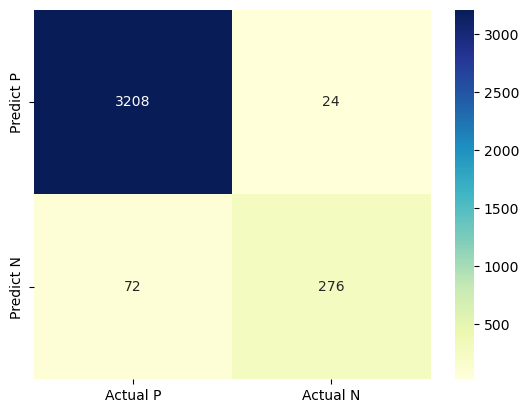

In [49]:
sns.heatmap(simple_cm, annot=True, fmt='d', cmap='YlGnBu')
pass

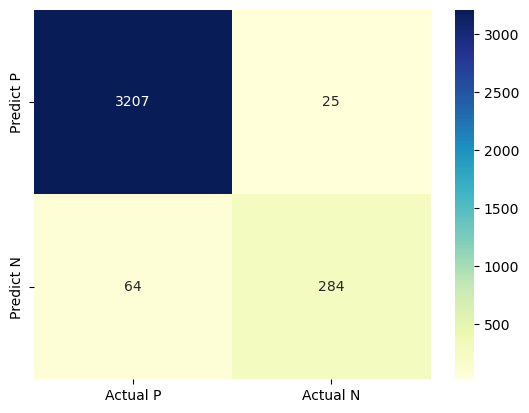

In [54]:
sns.heatmap(best_cm, annot=True, fmt='d', cmap='YlGnBu')
pass

## Заключение

Преимущества SVM перед методом стохастического градиента и нейронными сетями:
  * Задача выпуклого квадратичного программирования хорошо изучена и имеет единственное решение
  * Метод опорных векторов эквивалентен двухслойной нейронной сети, где число нейронов на скрытом слое определяется автоматически как число опорных векторов
  * Принцип оптимальной разделяющей гиперплоскости приводит к максимизации ширины разделяющей полосы, а следовательно, к более уверенной классификации

Недостатки классического SVM:

  * Неустойчивость к шуму: выбросы в исходных данных становятся опорными объектами-нарушителями и напрямую влияют на построение разделяющей гиперплоскости.
  * Не описаны общие методы построения ядер и спрямляющих пространств, наиболее подходящих для конкретной задачи.
  * Нет отбора признаков.
  * Необходимо подбирать константу C при помощи кросс-валидации.